In [1]:
print("Muhammad Saqib Anwar")
print("Semester: 7th")
print("Shift: Evening")
print("MIS Number: 35960")


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

df = pd.read_csv(r"C:\Users\User\Desktop\Assigments\Data Visulization\Data Set\Smartphones_cleaned_dataset.csv")
df.head()




Muhammad Saqib Anwar
Semester: 7th
Shift: Evening
MIS Number: 35960


brand_name                      model  price  rating  has_5g  has_nfc  \
0    oneplus              OnePlus 11 5G  54999    89.0    True     True   
1    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0    True    False   
2    samsung      Samsung Galaxy A14 5G  16499    75.0    True    False   
3   motorola       Motorola Moto G62 5G  14999    81.0    True    False   
4     realme         Realme 10 Pro Plus  24999    82.0    True    False   

   has_ir_blaster processor_brand  num_cores  processor_speed  ...  \
0           False      snapdragon        8.0              3.2  ...   
1           False      snapdragon        8.0              2.2  ...   
2           False          exynos        8.0              2.4  ...   
3           False      snapdragon        8.0              2.2  ...   
4           False       dimensity        8.0              2.6  ...   

   refresh_rate  num_rear_cameras  num_front_cameras       os  \
0           120                 3                1.0  android   
1           120                 3                1.0  android   
2            90                 3                1.0  android   
3           120                 3                1.0  android   
4           120                 3                1.0  android   

   primary_camera_rear  primary_camera_front  extended_memory_available  \
0                 50.0                  16.0                          0   
1                 64.0                  16.0                          1   
2                 50.0                  13.0                          1   
3                 50.0                  16.0                          1   
4                108.0                  16.0                          0   

   extended_upto  resolution_width resolution_height  
0            NaN              1440              3216  
1         1024.0              1080              2412  
2         1024.0              1080              2408  
3         1024.0              1080              2400  
4            NaN              1080              2412  

[5 rows x 26 columns]

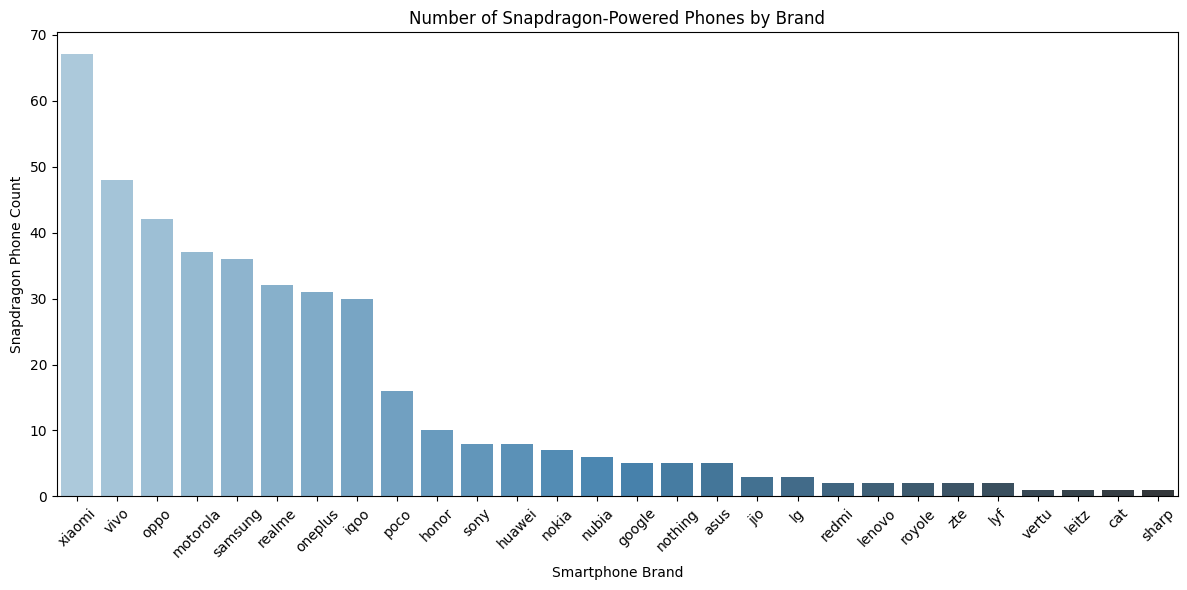

In [2]:
# 1Ô∏è‚É£ Filter only Snapdragon entries
snapdragon_df = df[df['processor_brand'].str.lower() == 'snapdragon']

# 2Ô∏è‚É£ Count Snapdragon models per brand
snap_counts = snapdragon_df['brand_name'].value_counts().reset_index()
snap_counts.columns = ['Brand', 'Snapdragon Count']

# 3Ô∏è‚É£ Bar chart
plt.figure(figsize=(12,6))
sns.barplot(
    data=snap_counts,
    x='Brand',
    y='Snapdragon Count',
    hue='Brand',
    palette='Blues_d',
    legend=False
)


plt.title("Number of Snapdragon-Powered Phones by Brand")
plt.xlabel("Smartphone Brand")
plt.ylabel("Snapdragon Phone Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



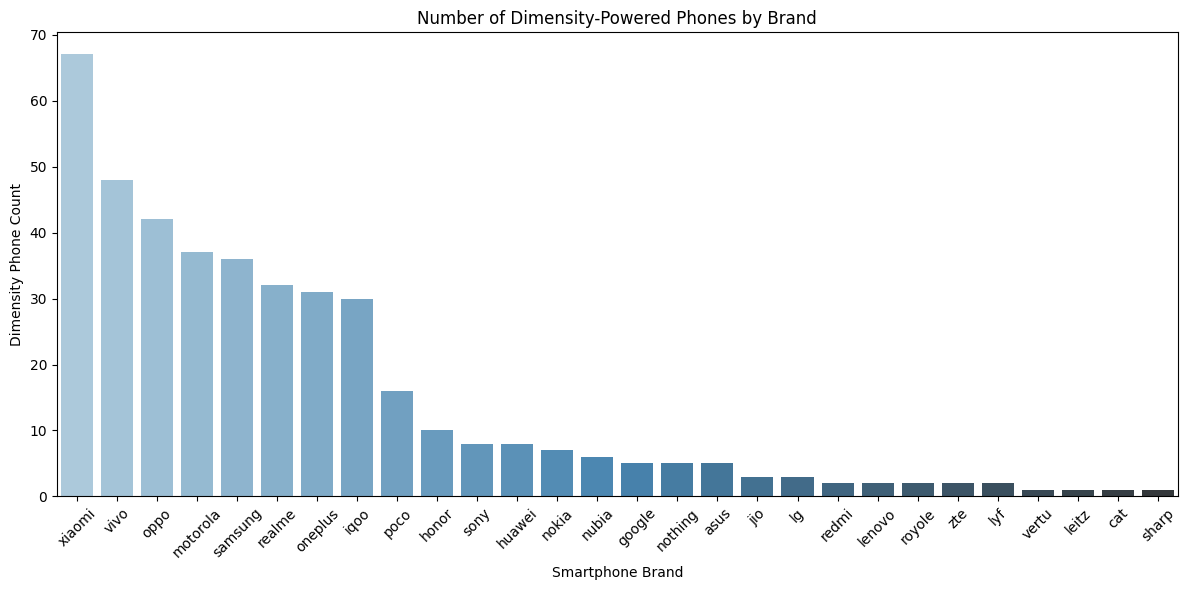

In [3]:
# 1Ô∏è‚É£ Filter rows where processor name includes 'Dimensity' (case-insensitive)
dimensity_df = df[df['model'].str.contains('Dimensity', case=False, na=False) | 
                  df['processor_brand'].str.contains('Dimensity', case=False, na=False)]

# 2Ô∏è‚É£ Count phones with Dimensity per brand
dimensity_counts = dimensity_df['brand_name'].value_counts().reset_index()
dimensity_counts.columns = ['Brand', 'Dimensity Count']

# 3Ô∏è‚É£ Bar chart
plt.figure(figsize=(12,6))
sns.barplot(
    data=snap_counts,
    x='Brand',
    y='Snapdragon Count',
    hue='Brand',
    palette='Blues_d',
    legend=False
)


plt.title("Number of Dimensity-Powered Phones by Brand")
plt.xlabel("Smartphone Brand")
plt.ylabel("Dimensity Phone Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


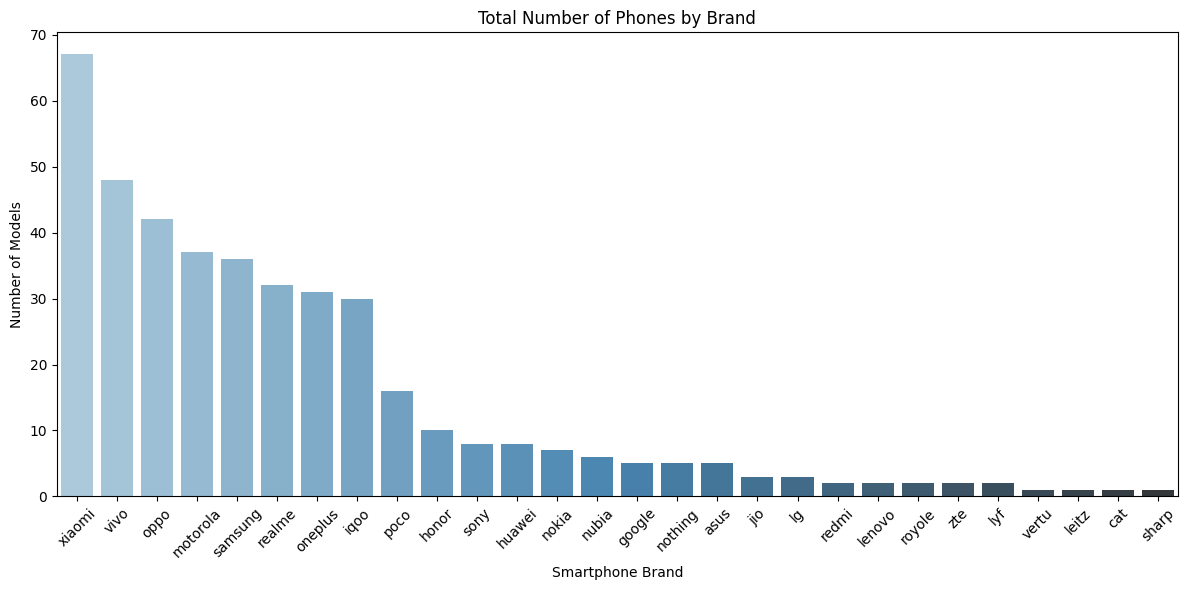

In [4]:
# 1Ô∏è‚É£ Count phones per brand
brand_counts = df['brand_name'].value_counts().reset_index()
brand_counts.columns = ['Brand', 'Total Phones']

# 2Ô∏è‚É£ Bar chart
plt.figure(figsize=(12,6))
sns.barplot(
    data=snap_counts,
    x='Brand',
    y='Snapdragon Count',
    hue='Brand',
    palette='Blues_d',
    legend=False
)


plt.title("Total Number of Phones by Brand")
plt.xlabel("Smartphone Brand")
plt.ylabel("Number of Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


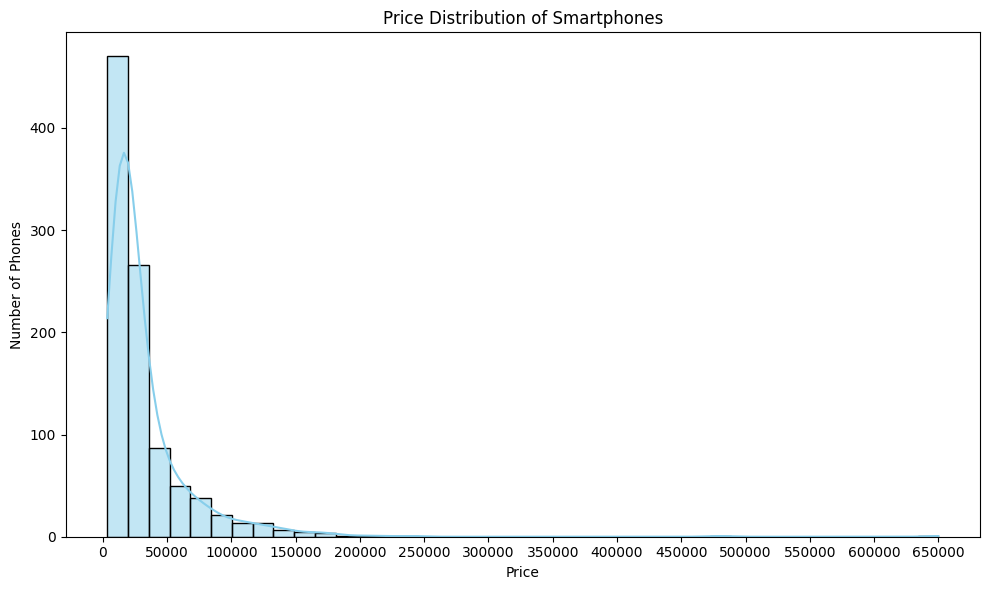

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10,6))

# üìä Histogram of price
sns.histplot(df['price'], bins=40, kde=True, color='skyblue')

# üè∑Ô∏è Title and axis labels
plt.title("Price Distribution of Smartphones")
plt.xlabel("Price")
plt.ylabel("Number of Phones")

# üî¢ Set X-axis ticks every 25,000
max_price = df['price'].max()
plt.xticks(np.arange(0, max_price + 50000, 50000))

plt.tight_layout()
plt.show()



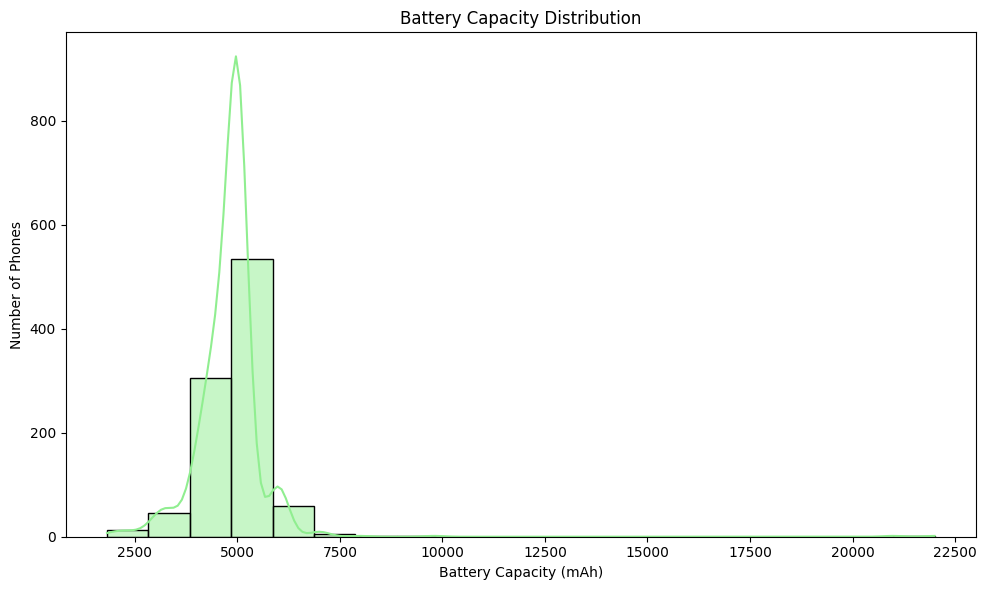

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(df['battery_capacity'], bins=20, kde=True, color='lightgreen')

plt.title("Battery Capacity Distribution")
plt.xlabel("Battery Capacity (mAh)")
plt.ylabel("Number of Phones")
plt.tight_layout()
plt.show()


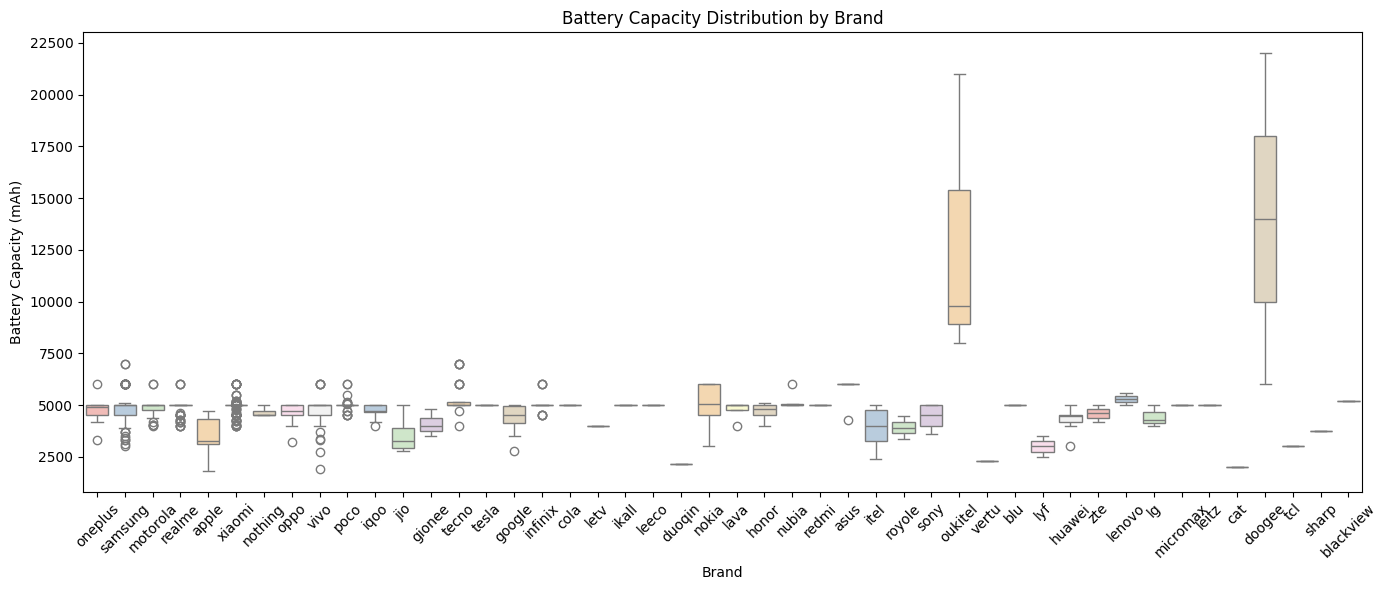

In [7]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='brand_name', y='battery_capacity', palette='Pastel1')

plt.title("Battery Capacity Distribution by Brand")
plt.xlabel("Brand")
plt.ylabel("Battery Capacity (mAh)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


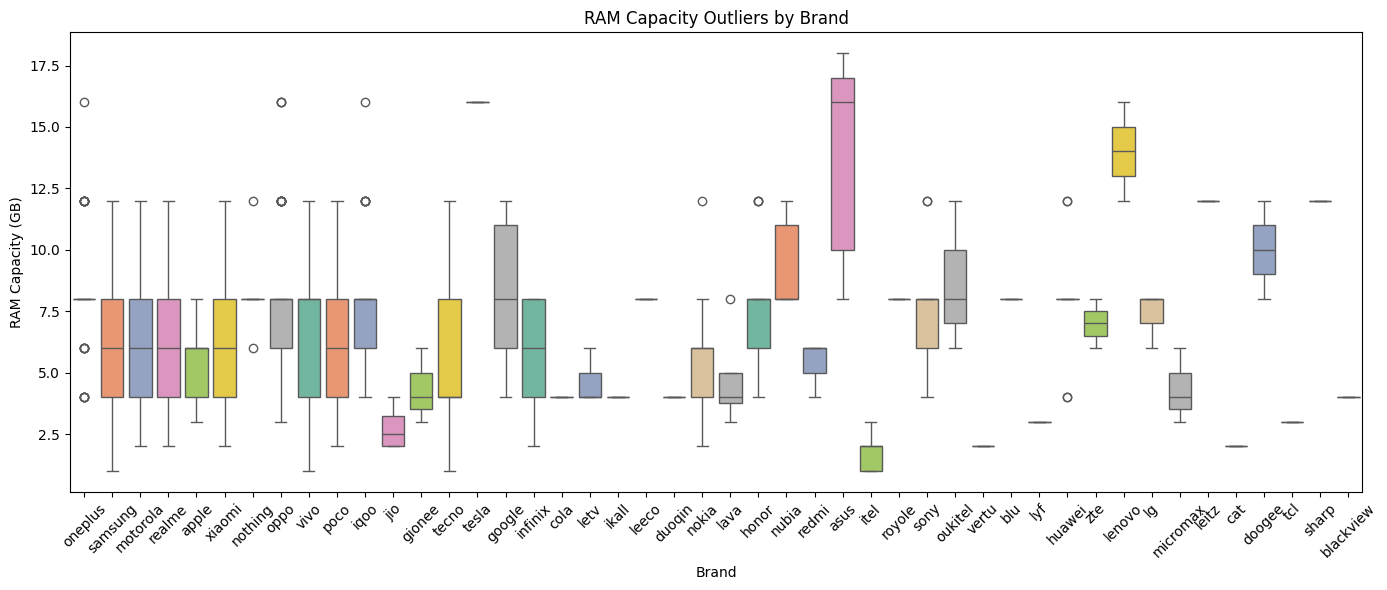

In [8]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='brand_name', y='ram_capacity', palette='Set2')

plt.title("RAM Capacity Outliers by Brand")
plt.xlabel("Brand")
plt.ylabel("RAM Capacity (GB)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


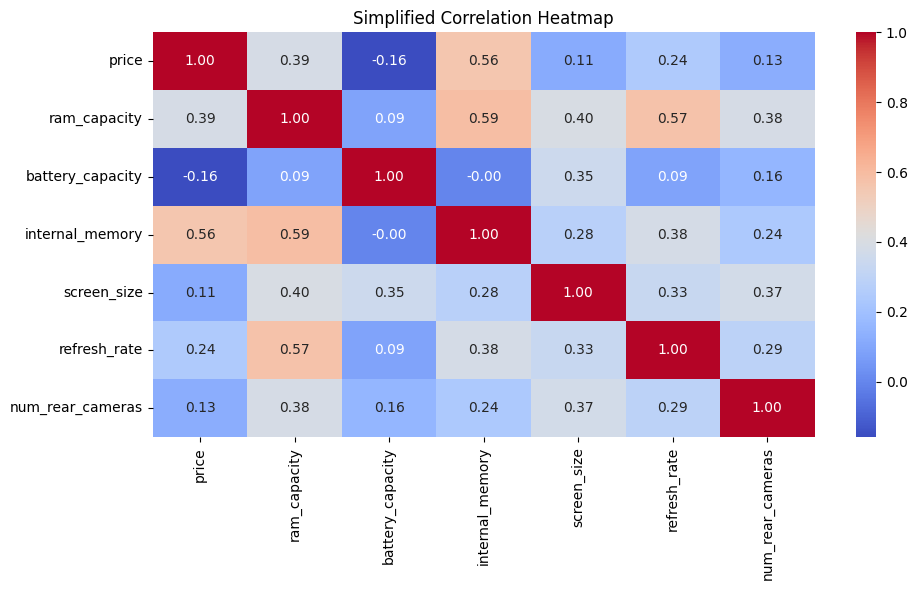

In [9]:
plt.figure(figsize=(10,6))

# Select only key numeric features
selected_columns = ['price', 'ram_capacity', 'battery_capacity', 'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras']
corr_matrix = df[selected_columns].corr()

# Plot simplified heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Simplified Correlation Heatmap")
plt.tight_layout()
plt.show()


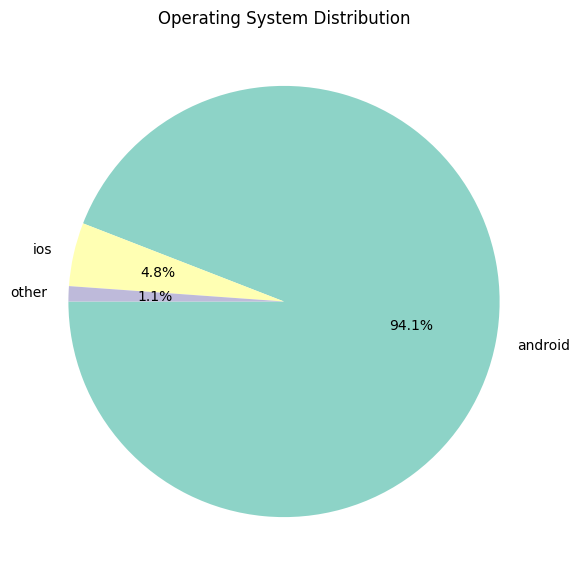

In [10]:
df['os'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(7,7), startangle=180, colors=sns.color_palette('Set3'))
plt.title("Operating System Distribution")
plt.ylabel('')
plt.show()


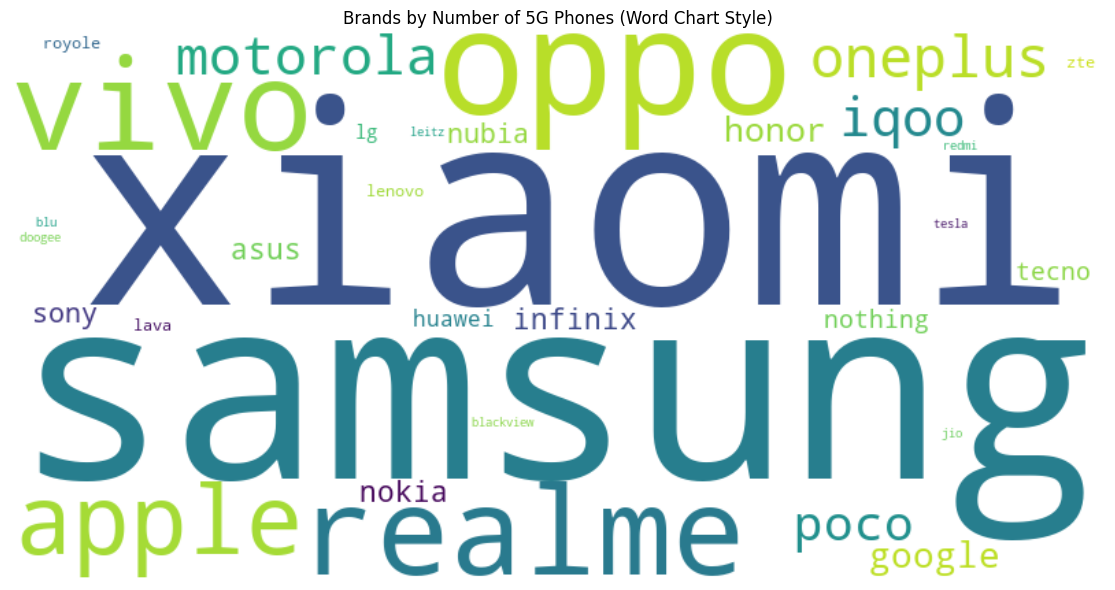

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# üìä Filter only 5G-supported phones
brands_5g = df[df['has_5g'] == True]['brand_name'].value_counts()

# üñºÔ∏è Create word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(brands_5g)

# üîç Display the word cloud
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Brands by Number of 5G Phones (Word Chart Style)")
plt.tight_layout()
plt.show()


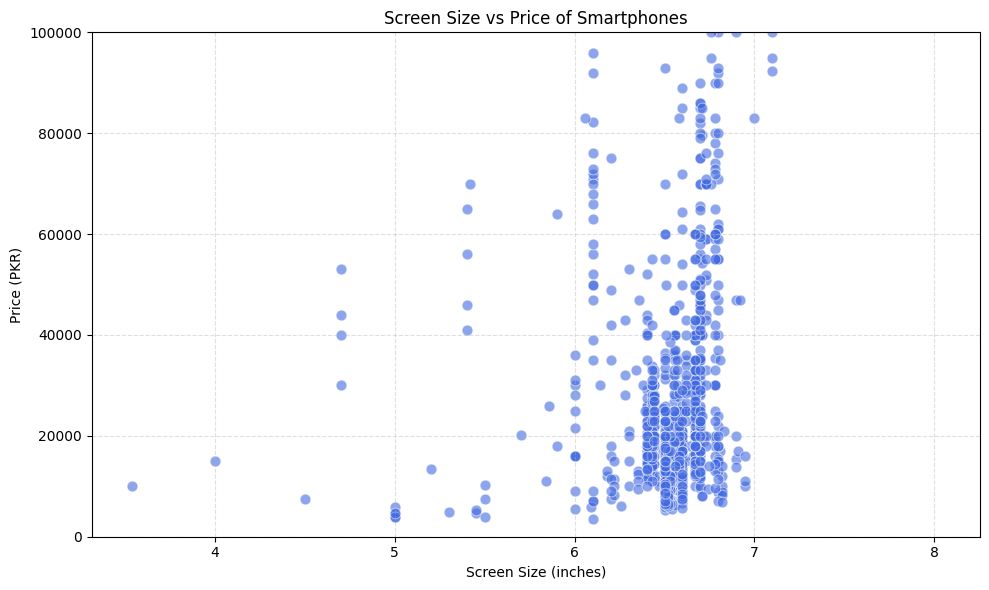

In [12]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=df,
    x='screen_size',
    y='price',
    color='royalblue',
    alpha=0.6,
    s=60
)

plt.title("Screen Size vs Price of Smartphones")
plt.xlabel("Screen Size (inches)")
plt.ylabel("Price (PKR)")
plt.ylim(0, 100000)  # Set custom y-axis range here
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


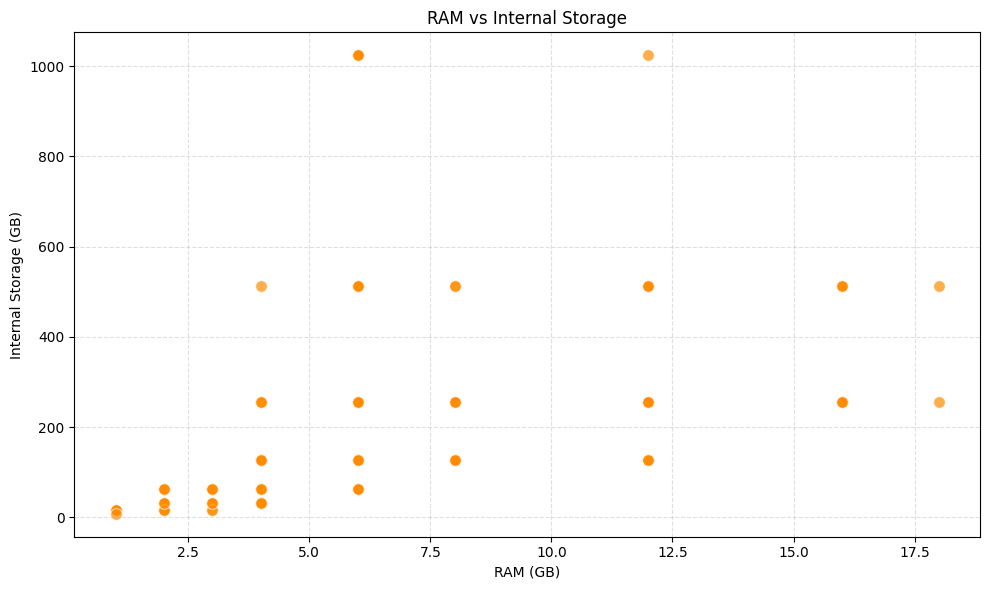

In [13]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=df,
    x='ram_capacity',
    y='internal_memory',
    color='darkorange',
    s=70,
    alpha=0.7
)

plt.title("RAM vs Internal Storage")
plt.xlabel("RAM (GB)")
plt.ylabel("Internal Storage (GB)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


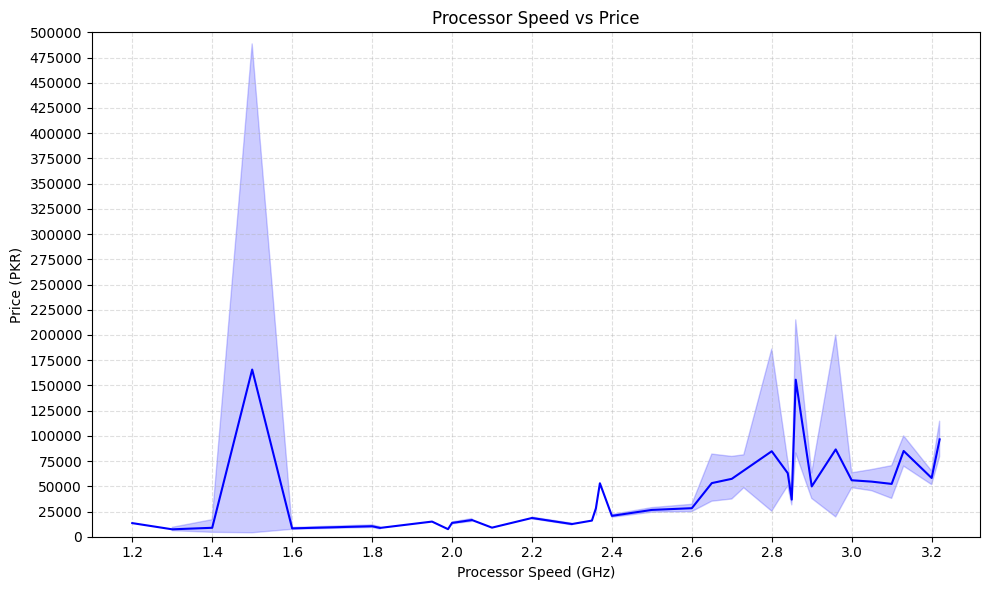

In [14]:
import numpy as np

plt.figure(figsize=(10,6))

# Lineplot of processor speed vs price
sns.lineplot(
    data=df.sort_values('processor_speed'),
    x='processor_speed',
    y='price',
    color='blue'
)

plt.title("Processor Speed vs Price")
plt.xlabel("Processor Speed (GHz)")
plt.ylabel("Price (PKR)")

# Set y-axis scale to max 600,000 PKR in 25K steps
plt.yticks(np.arange(0, 600001, 25000))
plt.ylim(0, 500000)

# X-axis: 0.2 GHz step size
min_speed = round(df['processor_speed'].min(), 1)
max_speed = round(df['processor_speed'].max(), 1)
plt.xticks(np.arange(min_speed, max_speed + 0.2, 0.2))

plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



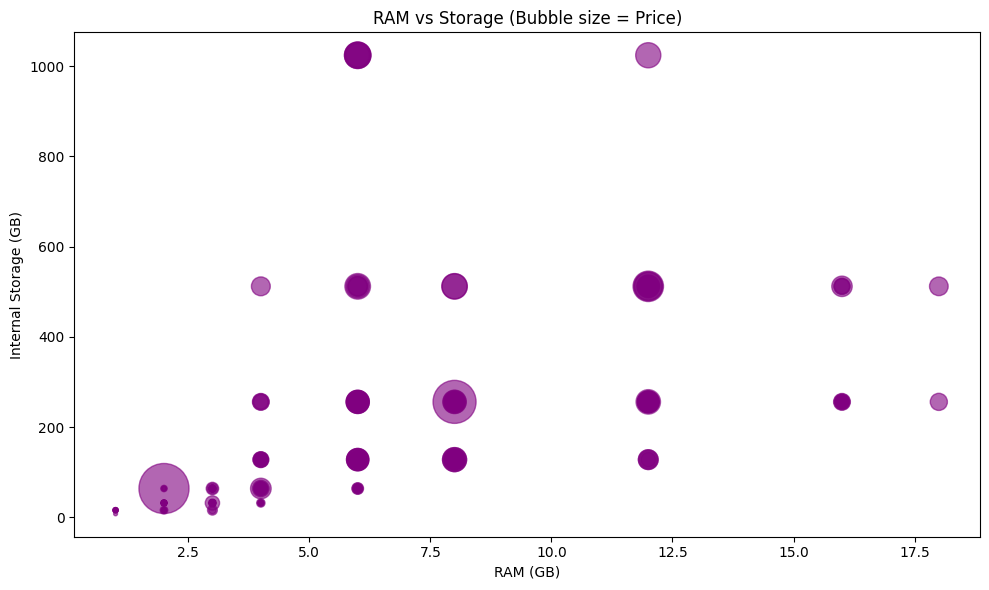

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(
    df['ram_capacity'],
    df['internal_memory'],
    s=df['price'] / 500,    # bubble size
    c='purple',
    alpha=0.6
)
plt.xlabel("RAM (GB)")
plt.ylabel("Internal Storage (GB)")
plt.title("RAM vs Storage (Bubble size = Price)")
plt.tight_layout()
plt.show()
